# Simple Linear Regression


### Import CSV file

In [47]:
#import pandas the data analysis library for python
import pandas as pd 

#upload excel file
labdf = pd.read_csv("diabetes.csv")


print(labdf.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


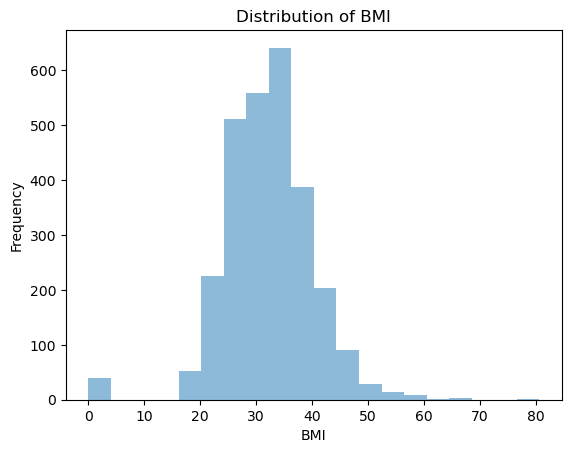

In [48]:
import matplotlib.pyplot as plt

#add histograms to one plot
plt.hist(labdf['BMI'], alpha=0.5, label='General Surg', bins=20)

#add plot title and axis labels
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

#display plot
plt.show()

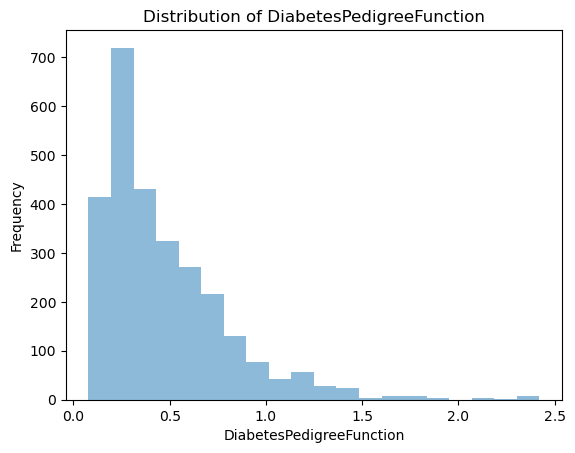

In [49]:
#add histograms to one plot
plt.hist(labdf['DiabetesPedigreeFunction'], alpha=0.5, label='General Surg', bins=20)

#add plot title and axis labels
plt.title('Distribution of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')

#display plot
plt.show()

# Clean up

In [86]:
print("Total number of DPF values above 2: \n", sum(labdf['DiabetesPedigreeFunction'] > 2.0))
print("Total number of BMI values above 0: \n", sum(labdf['BMI'] == 0))


labdf2 = labdf[labdf['DiabetesPedigreeFunction'] < 2]
labdf3 = labdf2[labdf2['BMI'] != 0]
labdf4 = labdf3[labdf3['BMI'] < 60]
len(labdf4)

print("Total number of rows: \n", len(labdf))
print("Total number of rows after exclusions: \n", len(labdf4))


Total number of DPF values above 2: 
 12
Total number of BMI values above 0: 
 39
Total number of rows: 
 2768
Total number of rows after exclusions: 
 2709


### Fit linear regression

In [87]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

XX = labdf4['BMI'].array
YY = labdf4['DiabetesPedigreeFunction'].array

#wo-dimensional array
XX = XX.reshape(-1, 1)

In [88]:
reg = linear_model.LinearRegression()
reg.fit(XX, YY)


# Make predictions using the testing set
y_pred = reg.predict(XX)

In [89]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(YY, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(YY, y_pred))


Coefficients: 
 [0.00527351]
Mean squared error: 0.09
Coefficient of determination: 0.01


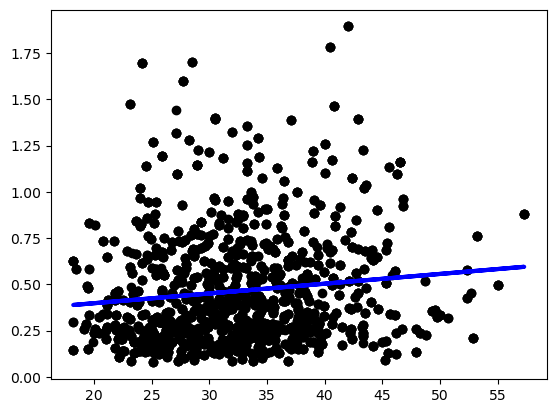

In [90]:
# Plot outputs
plt.scatter(XX, YY, color="black")
plt.plot(XX, y_pred, color="blue", linewidth=3)


plt.show()

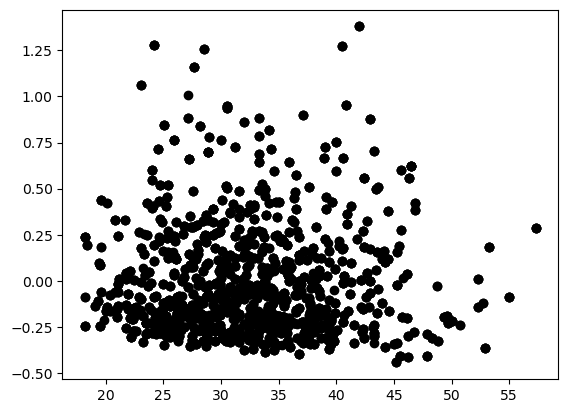

In [94]:
residuals = YY - y_pred

plt.scatter(XX, residuals, color="black")
